In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_folder = "data/archive/Data_Annotated_Subset_Object_Detectors/testing/Apr Month/"
unity_video_folder = "unity_video/"

In [17]:
video = cv2.VideoCapture(unity_video_folder + "movie_017.mp4")
ret, background = cv2.VideoCapture(unity_video_folder + "movie_016.mp4").read()
image = cv2.imread(data_folder + "20210401_clip_0_0000_img_5.jpg")

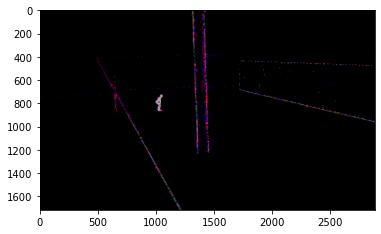

In [15]:
ret, frame = video.read()

sub = frame - background
sub[sub < 10] = 0

plt.imshow(sub)

# subtract frame from background
# make mask
# find alpha mask from greens
# blend

In [34]:
video = cv2.VideoCapture(unity_video_folder + "movie_017.mp4")
image = cv2.imread(data_folder + "20210401_clip_0_0000_img_5.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_video = []

for i in range(int(video.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame = video.read()
    
    subtract = int((frame.shape[1] - ((image.shape[1]/image.shape[0])*frame.shape[0]))/2)
    
    u_green = np.array([100, 255, 100])
    l_green = np.array([0, 10, 0])
    
    mask = cv2.inRange(frame, l_green, u_green)
    mask = cv2.blur(mask, (5, 5))
    mask = mask[:,subtract:-subtract]
    mask = cv2.resize(mask, (384, 288))

    frame = frame[:,subtract:-subtract]
    frame = cv2.resize(frame, (384, 288))
    
    f = np.array(image * (mask/255) + cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) * (np.ones((288, 384)) - (mask/255)), dtype='uint8')
    
    cv2.imshow("image", image)
    cv2.imshow("video", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("f", f)
    
    new_video.append(f)
 
    if cv2.waitKey(25) == 27:
        break

new_video = np.array(new_video)
print(new_video.shape)
        
video.release()
cv2.destroyAllWindows()

(133, 288, 384)


In [35]:
size = 288, 384

fps = 30

out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (size[1], size[0]), False)
for frame in new_video:
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    data = np.random.randint(0, 256, size, dtype='uint8')
    out.write(frame)
out.release()

print(frame)
print(data)

[[187 193 184 ... 172 168 161]
 [192 195 190 ... 182 178 171]
 [186 192 185 ... 178 173 166]
 ...
 [104 109 108 ... 105 103 105]
 [ 90  96  94 ... 106 105 107]
 [ 92 102 104 ... 108 107 110]]
[[211 190 246 ...  89  71 101]
 [244  24  67 ...  99  28 120]
 [ 67  37 211 ... 227  80 204]
 ...
 [123 132 141 ...  13 125 220]
 [223  37 235 ... 114  23  70]
 [238 101 126 ... 105 116  57]]
